In [1]:
# Clustering algorithms for unsupervised classification.

In [2]:
# Import packages
import pandas as pd

In [4]:
# Import the dataset
df = pd.read_csv('/home/mitu/Mall_Customers.csv')

In [5]:
df.shape

(200, 5)

In [6]:
list(df.columns)

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [7]:
# Input data
x = df.iloc[:,3:]

In [8]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
# Summerize
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# import seaborn package
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Density'>

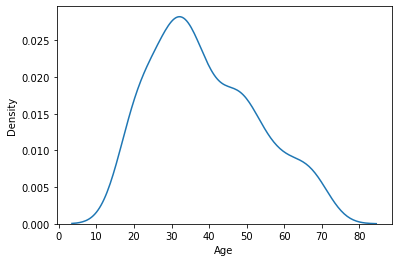

In [11]:
sns.kdeplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

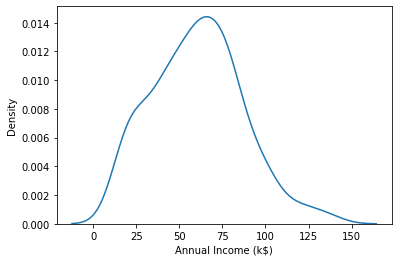

In [12]:
sns.kdeplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

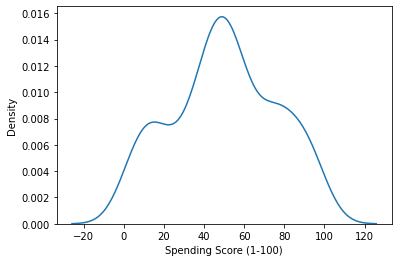

In [13]:
sns.kdeplot(df['Spending Score (1-100)'])

/home/mitu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

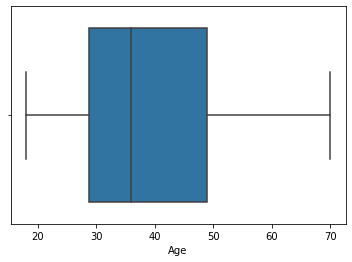

In [14]:
sns.boxplot(df['Age'])

/home/mitu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

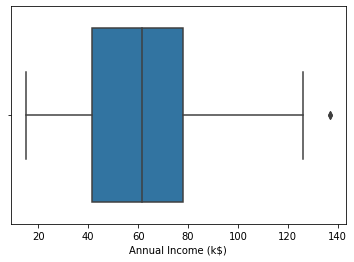

In [15]:
sns.boxplot(df['Annual Income (k$)'])

/home/mitu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

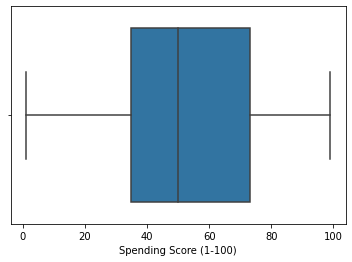

In [16]:
sns.boxplot(df['Spending Score (1-100)'])

In [17]:
# Import the class
from sklearn.cluster import KMeans

In [18]:
# Create the object
km = KMeans(n_clusters=12, random_state=0)

In [19]:
# Train the algorithm
labels = km.fit_predict(x)

In [20]:
# Sum of squared errors
km.inertia_

15810.838613705504

In [21]:
# elbow method
sse = []
for k in range(1,41):
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(x)
    sse.append(km.inertia_)

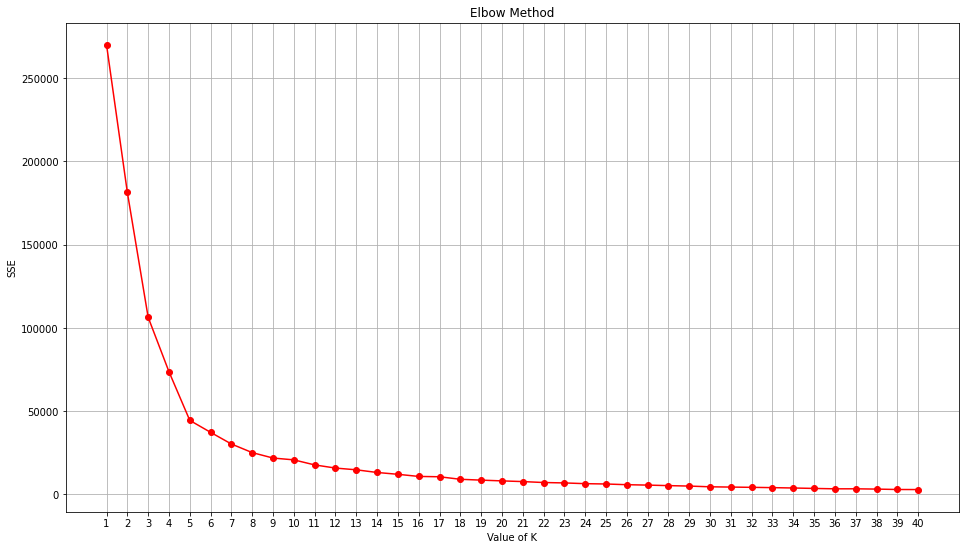

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41), sse, marker='o', color='r')

In [23]:
# Silhoutte method
from sklearn.metrics import silhouette_score

In [24]:
silh = []
for k in range(2,16):
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

<BarContainer object of 14 artists>

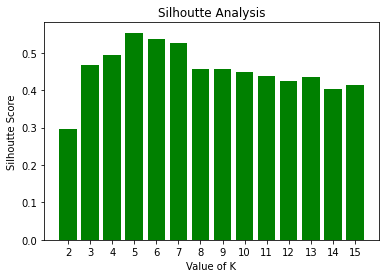

In [25]:
# plot the silhoutte scores
plt.title('Silhoutte Analysis')
plt.xlabel('Value of K')
plt.ylabel('Silhoutte Score')
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color='g')

In [26]:
# Create the object
km = KMeans(n_clusters=5, random_state=0)

In [27]:
# Train the algorithm
labels = km.fit_predict(x)

In [28]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [29]:
# Cluster labels
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [30]:
# SSE
km.inertia_

44448.45544793369

In [31]:
# Centroids
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [32]:
# Extract the clusters
df[labels==2]  # Boolean filtering

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93


In [33]:
one = df[labels==1]

In [34]:
one.shape

(81, 5)

In [35]:
# Export the cluster
one.to_csv('one.csv')

In [36]:
print('Cluster-0:', len(df[labels==0]))
print('Cluster-1:', len(df[labels==1]))
print('Cluster-2:', len(df[labels==2]))
print('Cluster-3:', len(df[labels==3]))
print('Cluster-4:', len(df[labels==4]))

Cluster-0: 35
Cluster-1: 81
Cluster-2: 39
Cluster-3: 22
Cluster-4: 23


In [37]:
# Prediction
new = [[45, 76]]
km.predict(new)[0]

3

In [38]:
# Prediction
new = [[25, 36]]
km.predict(new)[0]

4

In [39]:
# Prediction
new = [[85, 76]]
km.predict(new)[0]

2

In [40]:
# Prediction
new = [[45, 47]]
km.predict(new)[0]

1

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [46]:
import matplotlib.pyplot as plt

In [48]:
df['Genre']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Genre, Length: 200, dtype: int64

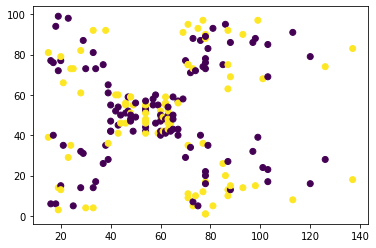

In [49]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Genre'])